# Geospatial Big Data Analytics Lab 5

Ευάγγελος Τσόγκας 03400120

Σε αυτή την εργασία θα ασχοληθούμε με επιβλεπόμενη ταξινόμηση σε τηλεσκοπικά δεδομένα.

In [47]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

## Part A: Binary Classification

Θα εκπαιδεύσουμε 3 μοντέλα μηχανικής μάθησης (Naive Bayes, kNN και Perceptron) για την ταξινόμηση των pixel μιας δορυφορικής απεικόνισης Sentinel-2 ως χερσαίο έδαφος ή υδάτινο σώμα.

### Data

Έχουμε στη διάθεσή μας δύο bands μιας εικόνας (Green και NIR) και μια εικόνα με τα labels, όπου το χρώμα άσπρο δηλώνει υδάτινο σώμα, ενώ το χρώμα μαύρο δηλώνει χερσαίο έδαφος. Αρχικά φορτώνουμε τα δεδομένα και δείχνουμε τις εικόνες.

(1000, 1000)
(1000, 1000)
(1000, 1000)
0 255


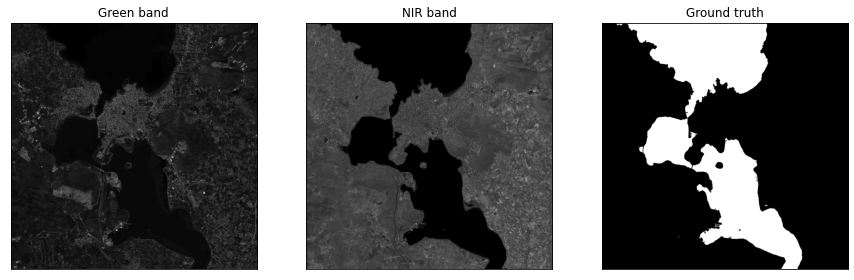

In [39]:
# load data
green_band = imread('data/partA/green.tif')
nir_band = imread('data/partA/nir.tif')
gt = imread('data/partA/gt.tif')

print(green_band.shape)
print(nir_band.shape)
print(gt.shape)
print(np.min(gt), np.max(gt))

# show images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(green_band, cmap='gray')
ax1.set_title("Green band")
ax2.imshow(nir_band, cmap='gray')
ax2.set_title("NIR band")
ax3.imshow(gt, cmap='gray')
ax3.set_title("Ground truth")
for ax in (ax1, ax2, ax3):
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

Παρατηρούμε πως οι εικόνες έχουν διαστάσεις 1000x1000 και το άσπρο χρώμα έχει την τιμή 255 την οποία θα μετατρέψουμε σε 1 και θα αναπαραστήσουμε τις τιμές των pixel ως vectors με δύο στήλες για τις τιμές των 2 bands αντίστοιχα. Στη συνέχεια, χωρίζουμε τα δεδομένα σε 70% train και 30% test και τα κανονικοποιούμε.

In [40]:
# prepare labels
y = gt.copy().flatten()  # copy so that the array is mutable
y[y > 0] = 1  # set white values (255) to 1
print(y.shape)

# prepare vectors
x = np.hstack((green_band.reshape(-1, 1), nir_band.reshape(-1, 1)))
print(x.shape)

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# normalization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

(1000000,)
(1000000, 2)


Με αυτά τα δεδομένα εκπαιδεύουμε στη συνέχεια τα 3 μοντέλα.

### Naive Bayes

In [62]:
# fit model
model = GaussianNB()
model.fit(x_train, y_train)

# evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}".format(tn, fp, fn, tp))

              precision    recall  f1-score   support

           0      0.997     1.000     0.999    223043
           1      1.000     0.992     0.996     76957

    accuracy                          0.998    300000
   macro avg      0.999     0.996     0.997    300000
weighted avg      0.998     0.998     0.998    300000

True Negative: 223027, False Positive: 16, False Negative: 593, True Positive: 76364


### kNN

In [52]:
# fit model
model = KNeighborsClassifier()
model.fit(x_train, y_train)

# evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}".format(tn, fp, fn, tp))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000    223043
           1      1.000     1.000     1.000     76957

    accuracy                          1.000    300000
   macro avg      1.000     1.000     1.000    300000
weighted avg      1.000     1.000     1.000    300000

True Negative: 223043, False Positive: 0, False Negative: 2, True Positive: 76955


### Perceptron

In [53]:
# fit model
model = Perceptron(random_state=42)
model.fit(x_train, y_train)

# evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}".format(tn, fp, fn, tp))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000    223043
           1      1.000     1.000     1.000     76957

    accuracy                          1.000    300000
   macro avg      1.000     1.000     1.000    300000
weighted avg      1.000     1.000     1.000    300000

True Negative: 223043, False Positive: 0, False Negative: 0, True Positive: 76957


Παρατηρούμε πως το πρόβλημα είναι πολύ απλό, αφού και τα 3 μοντέλα είχαν άριστα αποτελέσματα με τις default παραμέτρους. Ειδικά, το Perceptron δεν έκανε κανένα λάθος, το μοντέλο kNN είχε μόνο 2 λάθοι και το μοντέλο naive bayes είχε συνολικά 16 false positives και 593 false negatives. 

Βλέπουμε πως δεν χρειάζεται tuning των υπερ-παραμέτρων, αλλά για σκοπούς επίδειξης θα κάνουμε grid-search cross-validation για το Perceptron (το kNN είναι πολύ αργό). Συγκεκριμένα θα εξετάσουμε τιμές για το learning rate (eta0) και για το τι είδους regularization (penalty) θα χρησιμοποιηθεί.

In [55]:
# parameter tuning
model = Perceptron(random_state=0)
parameters = {'eta0': [0.01, 0.1, 1, 5, 10], 'penalty': [None, 'l2', 'l1', 'elasticnet']}
model_cv = GridSearchCV(model, parameters, cv=5, n_jobs=5)
model_cv.fit(x_train, y_train)

print(model_cv.best_score_)
print(model_cv.best_params_)

# evaluate
y_pred = model_cv.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negative: {}, False Positive: {}, False Negative: {}, True Positive: {}".format(tn, fp, fn, tp))

1.0
{'eta0': 0.01, 'penalty': None}
              precision    recall  f1-score   support

           0      1.000     1.000     1.000    223043
           1      1.000     1.000     1.000     76957

    accuracy                          1.000    300000
   macro avg      1.000     1.000     1.000    300000
weighted avg      1.000     1.000     1.000    300000

True Negative: 223043, False Positive: 0, False Negative: 0, True Positive: 76957


Επιλέχθηκε eta0=0.01 και κανένα penalty. Βέβαια και με eta0=1 που είναι το default είχαμε άριστα αποτελέσματα, επομένως δεν έχει ιδιαίτερη σημασία στο συγκεκριμένο εύκολο πρόβλημα.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Part B: Multiclass Classification

Θα εκπαιδεύσουμε μοντέλα SVM και Random Forest, καθώς επίσης και MLP (σε Pytorch) για την ταξινόμηση των pixel μιας υπερ-φασματικής εικόνας 200 καναλιών σε 16 κατηγορίες.

### Data

Φορτώνουμε τα δεδομένα και αφαιρούμε τα pixel με label 0, καθώς δεν ανήκουν σε κάποια από τις κατηγορίες που θέλουμε. Στη συνέχεια, χωρίζουμε τα δεδομένα σε 70% train και 30% test και τα κανονικοποιούμε.

(145, 145, 200)
(145, 145)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


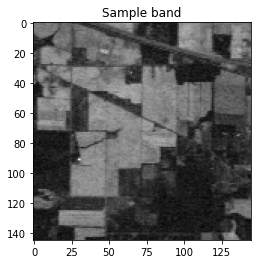

(10249,)
(10249, 200)


In [2]:
# load data
x = np.load('data/partB/indianpinearray.npy')
y = np.load('data/partB/IPgt.npy')

# print info
print(x.shape)
print(y.shape)
print(np.unique(y))

# show sample band
plt.imshow(x[:, :, 150], cmap="gray")
plt.title("Sample band")
plt.show()

# prepare labels
y = y.flatten()
no_class_indices = np.argwhere(y == 0)  # indices of pixels that don't belong to a class
y = np.delete(y, no_class_indices)
print(y.shape)

# prepare vectors
x = x.reshape(-1, x.shape[2])
x = np.delete(x, no_class_indices, axis=0)
print(x.shape)


# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# normalize
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### SVM

Αρχικά θα εκπαιδεύσουμε ένα μοντέλο SVM με τις default παραμέτρους για να δούμε πώς θα τα πάει και στη συνέχεια θα κάνουμε tune με grid-search cross-validation.

In [72]:
# model
model = SVC(C=1.0, kernel='rbf', random_state=0)
model.fit(x_train, y_train)

# evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000        14
           2      0.785     0.750     0.767       428
           3      0.884     0.550     0.678       249
           4      0.742     0.324     0.451        71
           5      0.940     0.869     0.903       145
           6      0.866     0.977     0.918       219
           7      0.000     0.000     0.000         8
           8      0.865     0.986     0.922       143
           9      0.000     0.000     0.000         6
          10      0.747     0.736     0.741       292
          11      0.729     0.900     0.806       737
          12      0.761     0.697     0.727       178
          13      0.938     1.000     0.968        61
          14      0.897     0.984     0.939       380
          15      0.901     0.552     0.684       116
          16      1.000     0.821     0.902        28

    accuracy                          0.808      3075
   macro avg      0.691   

C:\Users\Vagelis\Anaconda3\envs\conda_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vagelis\Anaconda3\envs\conda_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vagelis\Anaconda3\envs\conda_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Παρατηρούμε ότι στις κατηγορίες 1, 7, και 9 δεν κατάφερε να ταξινομήσει σωστά κανένα pixel λόγω imbalance (έχουν πολύ λίγα δείγματα). Στη συνέχεια θα κάνουμε tune την παράμετρο C για regularization. Ο kernel, επίσης είναι πολύ σημαντική παράμετρος, αλλά συνήθως ο default 'rbf' είναι αρκετά καλός.

In [74]:
# gridsearch
model = SVC(C=1.0, kernel='rbf', random_state=0)
parameters = {'C': [1, 10, 100, 1000]}
model_cv = GridSearchCV(model, parameters, cv=5, n_jobs=5)
model_cv.fit(x_train, y_train)

print(model_cv.best_score_)
print(model_cv.best_params_)

0.9042381389743366
{'C': 100}


In [73]:
# fit final model
model = SVC(C=100, kernel='rbf', class_weight=None, random_state=0)
model.fit(x_train, y_train)

# evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1      0.909     0.714     0.800        14
           2      0.892     0.928     0.910       428
           3      0.885     0.896     0.890       249
           4      0.800     0.732     0.765        71
           5      0.966     0.972     0.969       145
           6      0.991     0.991     0.991       219
           7      0.875     0.875     0.875         8
           8      0.966     0.993     0.979       143
           9      0.857     1.000     0.923         6
          10      0.893     0.860     0.876       292
          11      0.927     0.919     0.923       737
          12      0.901     0.921     0.911       178
          13      0.984     1.000     0.992        61
          14      0.953     0.966     0.959       380
          15      0.853     0.802     0.827       116
          16      1.000     0.929     0.963        28

    accuracy                          0.922      3075
   macro avg      0.916   

Παρατηρούμε ότι με C=100 (δηλαδή μικρότερο regularization) η ακρίβεια ανέβηκε από 80.8% σε 92.2% και το imbalance των κλάσεων δεν επηρέασε τόσο πολύ τα αποτελέσματα αυτή τη φορά.

### Random Forest

In [76]:
# model
model = RandomForestClassifier(random_state=0, n_jobs=5)
model.fit(x_train, y_train)

# evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1      1.000     0.643     0.783        14
           2      0.859     0.808     0.833       428
           3      0.918     0.719     0.806       249
           4      0.803     0.690     0.742        71
           5      0.942     0.890     0.915       145
           6      0.889     0.986     0.935       219
           7      1.000     0.875     0.933         8
           8      0.946     0.979     0.962       143
           9      1.000     0.333     0.500         6
          10      0.837     0.846     0.842       292
          11      0.823     0.919     0.868       737
          12      0.797     0.792     0.794       178
          13      0.951     0.951     0.951        61
          14      0.916     0.974     0.944       380
          15      0.793     0.595     0.680       116
          16      1.000     0.821     0.902        28

    accuracy                          0.866      3075
   macro avg      0.905   

Το Random Forest τα πήγε αρκετά καλά με τις default παραμέτρους με το μόνο σημαντικό πρόβλημα να αποτελεί η κατηγορία 9 με f1-score 0.5 και πολύ χαμηλό recall (δηλαδή αρκετά false negatives). Από το confusion matrix βλέπουμε πως μόνο 2 από τα 6 δείγματα ταξινομήθηκαν σωστά.

Οι παράμετροι που θα βελτιστοποιήσουμε είναι οι: n_estimators (πόσα δέντρα θα φτιαχτούν), max_depth (το μέγιστο βάθος των δέντρων για αποφυγή overfitting) και bootstrap (αν θα χρησιμοποιούνται bootstrap samples ή ολόκληρο το dataset για το fit κάθε δέντρου).

In [95]:
# gridsearch
model = RandomForestClassifier(n_estimators=100, max_depth=None, bootstrap=True, n_jobs=5, random_state=0)
parameters = {'n_estimators': [100, 150, 200], 'max_depth': [10, 20, 30, 40, 50], 'bootstrap': [True, False]}
model_cv = GridSearchCV(model, parameters, cv=5, n_jobs=5)
model_cv.fit(x_train, y_train)

print(model_cv.best_score_)
print(model_cv.best_params_)

0.8707838020400527
{'bootstrap': False, 'max_depth': 40, 'n_estimators': 200}


Παρατηρούμε πως επιλέχθηκαν 200 δέντρα με μέγιστο βάθος 40 και χωρίς χρήση bootstrap.

In [96]:
# final model
model = RandomForestClassifier(n_estimators=200, max_depth=40, bootstrap=False, n_jobs=5, random_state=0)
model.fit(x_train, y_train)

# evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1      1.000     0.714     0.833        14
           2      0.886     0.820     0.852       428
           3      0.896     0.759     0.822       249
           4      0.803     0.690     0.742        71
           5      0.950     0.910     0.930       145
           6      0.903     0.977     0.939       219
           7      1.000     0.875     0.933         8
           8      0.959     0.979     0.969       143
           9      1.000     0.500     0.667         6
          10      0.835     0.866     0.850       292
          11      0.845     0.920     0.881       737
          12      0.815     0.815     0.815       178
          13      0.951     0.951     0.951        61
          14      0.918     0.974     0.945       380
          15      0.787     0.638     0.705       116
          16      0.958     0.821     0.885        28

    accuracy                          0.877      3075
   macro avg      0.907   

Τα αποτελέσματα βλέπουμε πως δεν βελτιώθηκαν σημαντικά, αφού το accuracy από 86.6% πήγε 87.7% και το πρόβλημα με την κατηγορία 9 παραμένει με μόνο τα μισά δείγματα σωστά ταξινομημένα. Επίσης, βλέπουμε πως και στην κατηγορία 15 δεν έχει τόσο καλή επίδοση με f1-score 0.7, παρόλο που δεν αποτελείται από πολύ λίγα δείγματα. Από το confusion matrix βλέπουμε πως την μπερδεύει αρκετά με την κατηγορία 14.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

## Pytorch MLP

Αρχικά ορίζουμε την κλάση Dataset και τις συναρτήσεις που θα χρειαστούν για την εκπαίδευση και την αξιολόγηση των μοντέλων.

### Dataset

Το Dataset υποστηρίζει και transforms εικονικών δεδομένων, αλλά στην προκειμένη περίπτωση δεν θα χρησιμοποιήσουμε κάποιο, αφού τα δεδομένα είναι vectors.

In [2]:
class IPDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x.astype(np.float32)
        self.y = y.astype(np.int64)
        self.transform = transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        if self.transform:
            return self.transform(self.x[idx]), self.y[idx]
        else:
            return self.x[idx], self.y[idx]

### Training Loop

Στο training χρησιμοποιούμε early stopping έχοντας ένα validation set (10% του train set).

In [3]:
def fit(model, train_dl, val_dl, optimizer, device, max_epochs=100, patience=5, checkpoint_name='mlp.pt'):
    # set device
    model.to(device)

    # initialization
    train_loss = []  # store mean train loss per epoch
    val_loss = []  # store mean validation loss per epoch
    min_val_loss = np.Inf
    epochs_no_improve = 0

    # train model
    for epoch in range(max_epochs):
        running_train_loss = running_val_loss = 0.0
        model.train()

        for i, (X_batch, y_batch) in enumerate(train_dl):
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            out = model(X_batch)
            loss = F.cross_entropy(out, y_batch)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        train_loss.append(running_train_loss/len(train_dl))

        # calculate validation loss and accuracy
        correct = 0
        model.eval()
        with torch.no_grad():
            for i, data in enumerate(val_dl):
                X_batch, y_batch = data
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                out = model(X_batch)
                loss = F.cross_entropy(out, y_batch)
                running_val_loss += loss.item()
                correct += out.max(1)[1].eq(y_batch).sum()
        val_loss.append(running_val_loss/len(val_dl))
        val_acc = correct / len(val_dl.dataset)

        # print information
        print("Epoch: {}  -  loss: {}  -  val_loss: {}  - val_acc: {}".format(epoch+1, train_loss[epoch],
                                                                              val_loss[epoch], val_acc))

        # check for early stopping
        if val_loss[epoch] < min_val_loss:
            torch.save(model.state_dict(), checkpoint_name)
            epochs_no_improve = 0
            min_val_loss = val_loss[epoch]
        else:
            epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print('Early stopping')
            break
    return {'train_loss': train_loss, 'val_loss': val_loss}

### Inference

In [4]:
def predict(model, test_dl, device):
    # set device
    model.to(device)

    # predict test
    test_predictions = []
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(test_dl):
            X_batch, y_batch = data
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            out = model(X_batch)
            y_pred = out.max(1)[1]
            test_predictions.extend(y_pred.cpu().numpy())
    return test_predictions

### Results

Τα αποτελέσματα περιλαμβάνουν γραφήματα των καμπυλών εκμάθησης, classification report και confusion matrix.

In [11]:
def show_results(train_loss, val_loss, y_test, y_pred):
    plt.figure()
    plt.style.use('seaborn-whitegrid')
    plt.plot(train_loss, label="Train Loss", c='blue')
    plt.plot(val_loss, label='Validation Loss', c='orange')
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print(classification_report(y_test, y_pred, digits=3))
    print(confusion_matrix(y_test, y_pred))

### Models

Θα χρησιμοποιήσουμε δύο αρχιτεκτονικές MLP. Μία κλασική με 1 hidden layer (VanillaMLP) και μία με 2 hidden layers (DNN) και τεχνικές όπως batch normalization και dropout για επιτάχυνση της εκπαίδευσης και αποφυγή over-fitting.

In [13]:
class VanillaMLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(VanillaMLP, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.fc = nn.Linear(self.input_dim, 128)
        self.clf = nn.Linear(128, self.output_dim)

    def forward(self, x):
        x = self.fc(x)
        x = F.relu(x)
        x = self.clf(x)
        return x

    
class FFBlock(nn.Module):
    def __init__(self, in_features, out_features, dropout_rate):
        super(FFBlock, self).__init__()

        self.fc = nn.Linear(in_features, out_features)
        self.bn = nn.BatchNorm1d(out_features)
        self.drop = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.fc(x)
        x = self.bn(x)
        x = F.relu(x)
        x = self.drop(x)
        return x


class DNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DNN, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim

        self.ff = nn.Sequential(
            FFBlock(in_features=self.input_dim, out_features=256, dropout_rate=0.5),
            FFBlock(in_features=256, out_features=128, dropout_rate=0),
            nn.Linear(128, self.output_dim)
        )

    def forward(self, x):
        x = self.ff(x)
        return x

### Prepare data
Πριν προχωρήσουμε στην εκπαίδευση των μοντέλων φτιάχνουμε τα labels ώστε να αρχίζουν από το 0 όπως απαιτεί η Pytorch και δημιουργούμε ένα validation set ως 10% του train set. Στη συνέχεια, δημιουργούμε τους loaders και επίσης εισάγουμε ντετερμινιστικότητα για λόγους ακρίβειας στην αναφορά και περιγραφή των αποτελεσμάτων.

In [7]:
BATCH_SIZE = 256

# load data
x = np.load('data/partB/indianpinearray.npy')
y = np.load('data/partB/IPgt.npy')

# prepare labels
y = y.flatten()
no_class_indices = np.argwhere(y == 0)  # indices of pixels that don't belong to a class
y = np.delete(y, no_class_indices) - 1  # -1 because labels in pytorch need to start from 0

# prepare vectors
x = x.reshape(-1, x.shape[2])
x = np.delete(x, no_class_indices, axis=0)

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# normalize
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# train-val split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# deterministic
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

# create datasets and loaders
train_dataset = IPDataset(x_train, y_train)
val_dataset = IPDataset(x_val, y_val)
test_dataset = IPDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# print some info
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print("Device:", device)

Feature batch shape: torch.Size([256, 200])
Labels batch shape: torch.Size([256])
Device: cuda


### Train VanillaMLP

Εκπαιδεύουμε το MLP με την κλασική αρχιτεκτονική (1 hidden layer).

Epoch: 1  -  loss: 1.8045521470216603  -  val_loss: 1.4065096775690715  - val_acc: 0.4972144663333893
Epoch: 2  -  loss: 1.3289595292164729  -  val_loss: 1.2294137477874756  - val_acc: 0.5640668272972107
Epoch: 3  -  loss: 1.189390622652494  -  val_loss: 1.11864177385966  - val_acc: 0.5849581956863403
Epoch: 4  -  loss: 1.102174149109767  -  val_loss: 1.0448873440424602  - val_acc: 0.6323119401931763
Epoch: 5  -  loss: 1.0322221586337457  -  val_loss: 0.9839486678441366  - val_acc: 0.6364902257919312
Epoch: 6  -  loss: 0.9701798604084895  -  val_loss: 0.922477920850118  - val_acc: 0.6824512481689453
Epoch: 7  -  loss: 0.9124930294660422  -  val_loss: 0.8647250731786092  - val_acc: 0.6963788270950317
Epoch: 8  -  loss: 0.8717129574372218  -  val_loss: 0.8335109154383341  - val_acc: 0.7116991281509399
Epoch: 9  -  loss: 0.8288155794143677  -  val_loss: 0.7863244811693827  - val_acc: 0.7353760600090027
Epoch: 10  -  loss: 0.7829620861090146  -  val_loss: 0.7566982309023539  - val_acc: 0.7

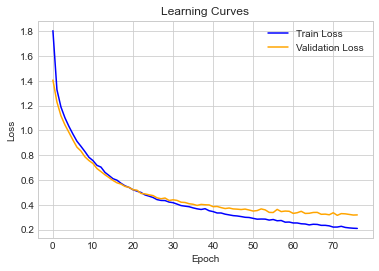

              precision    recall  f1-score   support

           0      0.833     0.714     0.769        14
           1      0.902     0.907     0.904       428
           2      0.823     0.823     0.823       249
           3      0.800     0.620     0.698        71
           4      0.938     0.945     0.942       145
           5      0.968     0.977     0.973       219
           6      1.000     0.875     0.933         8
           7      0.947     0.993     0.969       143
           8      1.000     1.000     1.000         6
           9      0.869     0.887     0.878       292
          10      0.888     0.881     0.884       737
          11      0.865     0.899     0.882       178
          12      0.968     1.000     0.984        61
          13      0.922     0.971     0.946       380
          14      0.854     0.707     0.774       116
          15      1.000     0.929     0.963        28

    accuracy                          0.897      3075
   macro avg      0.911   

In [12]:
# configuration
LEARNING_RATE = 0.001
MAX_EPOCHS = 100
PATIENCE = 5
checkpoint_name = 'mlp.pt'

# deterministic
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

# initialize model
model = VanillaMLP(input_dim=200, output_dim=16)

# train
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
history = fit(model, train_loader, val_loader, optimizer=optimizer, device=device, max_epochs=MAX_EPOCHS,
              patience=PATIENCE, checkpoint_name=checkpoint_name)

# predict
model = VanillaMLP(input_dim=200, output_dim=16)
model.load_state_dict(torch.load(checkpoint_name))  # load best model
y_pred = predict(model, test_loader, device)

# show results
show_results(history['train_loss'], history['val_loss'], y_test, y_pred)

### Train DNN

Εκπαιδεύουμε το MLP με 2 hidden layers, batch normalization και dropout.

Epoch: 1  -  loss: 1.8140762264911945  -  val_loss: 1.41547958056132  - val_acc: 0.5208913683891296
Epoch: 2  -  loss: 1.2989558256589449  -  val_loss: 1.1331633726755779  - val_acc: 0.6337047219276428
Epoch: 3  -  loss: 1.0957017953579242  -  val_loss: 0.9536324739456177  - val_acc: 0.6852367520332336
Epoch: 4  -  loss: 0.972347582762058  -  val_loss: 0.8409890333811442  - val_acc: 0.7367687821388245
Epoch: 5  -  loss: 0.88157385129195  -  val_loss: 0.7337242364883423  - val_acc: 0.770194947719574
Epoch: 6  -  loss: 0.8053518877579615  -  val_loss: 0.7038100560506185  - val_acc: 0.7604456543922424
Epoch: 7  -  loss: 0.764924379495474  -  val_loss: 0.6484977801640829  - val_acc: 0.8064066767692566
Epoch: 8  -  loss: 0.7041804400774149  -  val_loss: 0.5956001679102579  - val_acc: 0.8189414739608765
Epoch: 9  -  loss: 0.6623487449609317  -  val_loss: 0.5433865586916605  - val_acc: 0.8454039096832275
Epoch: 10  -  loss: 0.6399122384878305  -  val_loss: 0.510099987188975  - val_acc: 0.8398

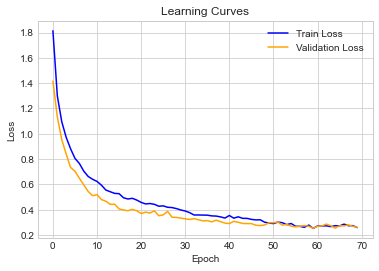

              precision    recall  f1-score   support

           0      0.750     0.857     0.800        14
           1      0.944     0.900     0.921       428
           2      0.950     0.835     0.889       249
           3      0.811     0.845     0.828        71
           4      0.958     0.952     0.955       145
           5      0.977     0.986     0.982       219
           6      0.778     0.875     0.824         8
           7      0.965     0.972     0.969       143
           8      1.000     1.000     1.000         6
           9      0.901     0.901     0.901       292
          10      0.895     0.934     0.914       737
          11      0.884     0.944     0.913       178
          12      0.984     1.000     0.992        61
          13      0.925     0.979     0.951       380
          14      0.892     0.716     0.794       116
          15      1.000     0.929     0.963        28

    accuracy                          0.921      3075
   macro avg      0.913   

In [15]:
# configuration
LEARNING_RATE = 0.001
MAX_EPOCHS = 100
PATIENCE = 10
checkpoint_name = 'mlp.pt'

# deterministic
torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

# initialize model
model = DNN(input_dim=200, output_dim=16)

# train
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
history = fit(model, train_loader, val_loader, optimizer=optimizer, device=device, max_epochs=MAX_EPOCHS,
              patience=PATIENCE, checkpoint_name=checkpoint_name)

# predict
model = DNN(input_dim=200, output_dim=16)
model.load_state_dict(torch.load(checkpoint_name))  # load best model
y_pred = predict(model, test_loader, device)

# show results
show_results(history['train_loss'], history['val_loss'], y_test, y_pred)

Παρατηρούμε πως το MLP με 2 hidden layers έχει καλύτερα αποτελέσματα από αυτό με 1 hidden layer (ακρίβεια 92.1% έναντι 89.7%). Η αύξηση του capacity σε συνδυασμό με το regularization μέσω batch normalization και dropout φαίνεται πως βελτίωσε τα αποτελέσματα και παρατηρούμε πως δεν υπάρχει κάποια κατηγορία στην οποία να συναντά σημαντικό πρόβλημα.

### Απαντήσεις στα ερωτήματα

**Β3.1. Γιατί παρατηρούνται σημαντικές διαφορές στις μετρικές ακρίβειας ανάμεσα στις κατηγορίες;**

Ο λόγος είναι οι imbalanced κατηγορίες. Τα μοντέλα μηχανικής μάθησης συνήθως δεν τα πηγαίνουν καλά όταν κάποιες κατηγορίες αποτελούνται από πολύ λίγα δείγματα, τείνοντας να έχουν πολλά false negatives για αυτές τις κατηγορίες. Όπως είδαμε όμως με σωστό tuning υπερ-παραμέτρων αυτό το πρόβλημα παύει να είναι τόσο σημαντικό (τουλάχιστον στην προκειμένη περίπτωση).

**Β3.2. Στην περίπτωση των MLP παρατηρείτε φαινόμενα overfit ή underfit; Γιατί;**

Δεν παρατηρήσαμε φαινόμενα overfit ούτε underfit. Και οι δύο αρχιτεκτονικές έχουν εκπαιδευτεί σωστά. Συγκεκριμένα, αποφύγαμε το overfit με τη χρήση early-stopping. Στο μοντέλο με 1 hidden layer βλέπουμε πως αν το αφήναμε να εκπαιδευτεί περισσότερο θα έκανε overfit, καθώς το validation loss παραμένει σταθερό, ενώ το training loss συνεχίζει να έχει καθοδική τάση. Στο μοντέλο με τα 2 hidden layers χρησιμοποιήσαμε batch normalization και dropout τα οποία βοηθούν ακόμα περισσότερο στην αποφυγή του overfit ειδικά σε αυτήν την περίπτωση που το capacity είναι μεγαλύτερο. Πράγματι, βλέπουμε πως το training loss και validation loss τείνουν να είναι σχεδόν ισάξια και σταθερά.

**Β3.3. Έχετε επιλέξει κατάλληλο ρυθμό εκμάθησης (learning rate) στα MLP; Γιατί;**

Ο ρυθμός εκμάθησης είναι κατάλληλος. Το learning rate είναι πιο δύσκολο στο tuning στην περίπτωση που χρησιμοποιούσαμε ως optimizer απλό SGD, όπου θα χρειαζόταν πιθανόν να φτιάξουμε κάποιον scheduler για την σταδιακή μείωσή του. Στην προκειμένη περίπτωση, όμως, χρησιμοποιώντας των Adam optimizer δεν χρειάζεται να ανησυχούμε για αυτό πέρα από την αρχική τιμή του learning rate που εμπειρικά 0.001 ή 0.0001 είναι καλές τιμές, εκτός από περιπτώσεις που κάνουμε transfer learning και fine-tune που συνήθως το θέτουμε μικρότερο. Ένδειξη ότι η επιλογή του learning rate είναι καλή αποτελούν τα learning curves που δεν είναι ούτε πολύ απότομα, κάτι που θα υποδείκνυε μεγαλύτερο learning rate από τι θα έπρεπε, αλλά ούτε και είναι πολύ μικρό όπου σε εκείνη την περίπτωση θα παρατηρούσαμε πολύ αργή πρόοδο.

**Β3.4. Για κάθε MLP που εκπαιδεύσατε ποιος κατά τη γνώμη σας είναι ο βέλτιστος αριθμός εποχών εκπαίδευσης;**

Χρησιμοποιώντας early-stopping ξέρουμε περίπου πόσες εποχές χρειάζονται για την εκπαίδευση σταματώντας την όταν το validation loss δεν μειώνεται για κάποιον συγκεκριμένο αριθμό συνεχόμενων εποχών. Από την εκπαίδευση βλέπουμε ότι περίπου 60-70 εποχές είναι ένας καλός αριθμός. Επίσης, σώζουμε checkpoints και οπότε δεν πειράζει αν εκπαιδευτεί το δίκτυο για λίγες παραπάνω εποχές, αφού στο τέλος χρησιμοποιούμε το καλύτερο μοντέλο (το checkpoint με το χαμηλότερο validation loss).
